# Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_roc_curve, roc_curve, auc, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

%matplotlib inline

# Data

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# there are no missing values
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
y = cancer['target']

# EDA

# train_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# PCA

In [ ]:
# first we need to identify number of pricnipale componets
# that can explain most of the data

Text(0, 0.5, 'captured varince')

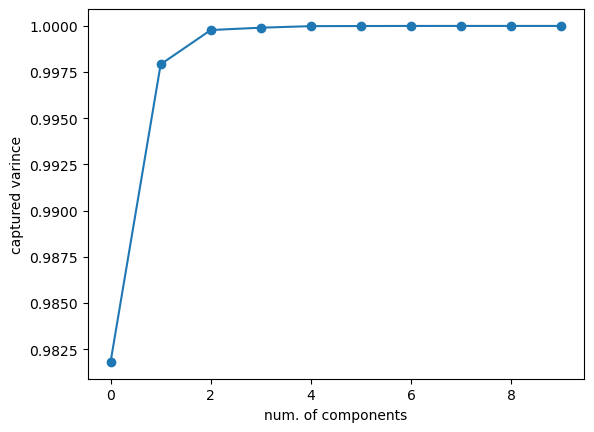

In [60]:
# as is seen from the plot 3 components can explain most of the data
pca = PCA(n_components=10)
pca.fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio, '-o')
plt.xlabel("num. of components")
plt.ylabel("captured varince")

# Pipelines

In [61]:
superFlow = ColumnTransformer([
    ("ScaleAgeFare", StandardScaler(), X.columns),
    ("PCA", PCA(n_components=3),  X.columns)
])

In [62]:
logReg = Pipeline(steps=
                  [('DataEngineering', superFlow),
                   ('Algo', LogisticRegression(max_iter=1000))
                  ])

forestGump = Pipeline(steps=
                  [('DataEngineering', superFlow),
                   ('Algo', RandomForestClassifier(max_depth=4))
                  ])

vectorSupportPoly = Pipeline(steps=
                  [('DataEngineering', superFlow),
                   ('Algo', SVC(kernel='poly', degree=7))
                  ])

vectorSupportRBF = Pipeline(steps=
                  [('DataEngineering', superFlow),
                   ('Algo', SVC(kernel='rbf', degree=7))
                  ])

vectorSupportSigmoid = Pipeline(steps=
                  [('DataEngineering', superFlow),
                   ('Algo', SVC(kernel='sigmoid', degree=7))
                  ])

In [63]:
logReg.fit(X_train, y_train)
forestGump.fit(X_train, y_train)
vectorSupportPoly.fit(X_train, y_train)
vectorSupportRBF.fit(X_train, y_train)
vectorSupportSigmoid.fit(X_train, y_train)
print("Finished")

Finished


In [64]:
print("===LogisticRegration====")
print(logReg.score(X_test, y_test))
print("===RandomForest====")
print(forestGump.score(X_test, y_test))
print("===SVM (Poly)====")
print(vectorSupportPoly.score(X_test, y_test))
print("===SVM (RBF)====")
print(vectorSupportRBF.score(X_test, y_test))
print("===SVM (Sigmoid)====")
print(vectorSupportRBF.score(X_test, y_test))

===LogisticRegration====
0.9790209790209791
===RandomForest====
0.972027972027972
===SVM (Poly)====
0.8111888111888111
===SVM (RBF)====
0.951048951048951
===SVM (Sigmoid)====
0.951048951048951


In [65]:
predictions = logReg.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [15]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [29]:
#logReg.fit(X_train_pca[0:], y_train)
logReg = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)
print("Finished")

Finished


[-1.31506748e-04  9.06533135e-03 -2.55891482e-01  3.77283183e+00
 -2.60108217e+01  1.25743064e+02]


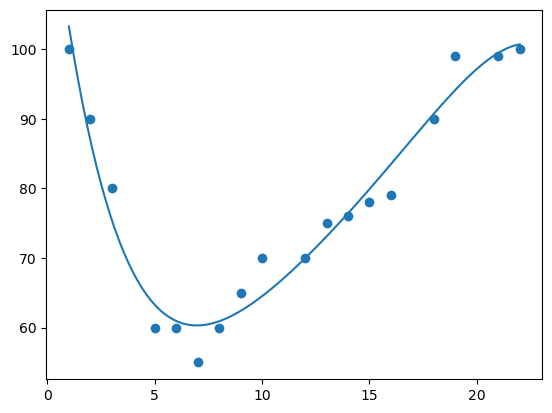

In [74]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

poly = np.polyfit(x, y, 5)
print(poly)

mymodel = np.poly1d(poly)

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()